In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def read(filename):
    df=pd.read_csv(filename)
    return df.values

In [85]:
x=read('C:\\Users\zeesh\OneDrive\Desktop\Linear_X_Train.csv')

In [86]:
y=read("C:\\Users\zeesh\OneDrive\Desktop\Linear_Y_Train.csv")


In [87]:

x=(x-x.mean())/x.std()


In [88]:
x=x.reshape((3750,))
y=y.reshape((3750,))

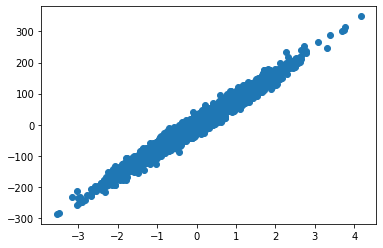

In [89]:
plt.scatter(x,y)
plt.show()

In [90]:
def hypothesis(theta,x):
    return theta[0]+theta[1]*x

In [91]:
def error(x,y,theta):
    total_error = 0
    m=x.shape[0]
    
    for i in range(m):
        total_error += (y[i]-hypothesis(theta,x[i]))**2
        
    return 0.5*total_error

In [92]:
def gradient(x,y,theta):
    grad=np.array([0.0,0.0])
    m=x.shape[0]
    
    for i in range(m):
        grad[0] += -1*(y[i]-hypothesis(theta,x[i]))
        grad[1] += -1*(y[i]-hypothesis(theta,x[i]))*x[i] 
    return grad

In [93]:
def gradientDescent(x,y,learning_rate,maxItr):
    grad=np.array([0.0,0.0])
    theta=np.array([0.0,0.0])
    theta_list=[]
    e=[]
    
    for i in range(maxItr):
        grad=gradient(x,y,theta)
        ce=error(x,y,theta)
        #print(grad)
       #print(ce)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]  
        e.append(ce)
        theta_list.append((theta[0],theta[1]))
    return theta,e,theta_list
    

In [94]:
theta,e,theta_list=gradientDescent(x,y,learning_rate=0.0001,maxItr=100)

In [95]:
print(theta)

[ 0.68386897 79.90573694]


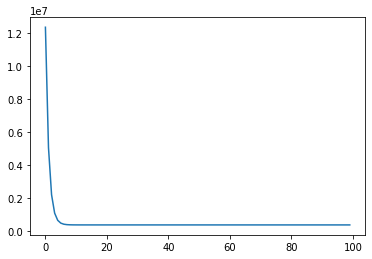

In [96]:
plt.plot(e)
plt.show()

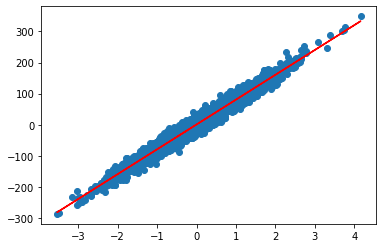

In [97]:
plt.scatter(x,y)
plt.plot(x,hypothesis(theta,x),color='r')
plt.show()

In [98]:
xt=read("C:\\Users\\zeesh\\OneDrive\\Desktop\\Linear_X_Test.csv")
#sample=read("C:\\Users\\zeesh\\OneDrive\\Desktop\\sample_submission_linear.csv")


In [99]:
yt=hypothesis(theta,xt)

In [100]:
yt=np.array(yt)
print(yt)


[[-149.37466337]
 [ -68.7567667 ]
 [-201.49222227]
 ...
 [  10.91242825]
 [ -21.53292954]
 [ -53.68602633]]


In [101]:
#sample['y']=yt
sample = pd.DataFrame(yt)
sample.to_csv('C:\\Users\\zeesh\\OneDrive\\Desktop\\sample_submission_linear.csv')